In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock="HDFCBANK.NS"
start=dt.datetime(2002,2,1)
end=dt.datetime(2024,12,30)

df= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5693 entries, 2002-02-01 to 2024-12-27
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, HDFCBANK.NS)   5693 non-null   float64
 1   (High, HDFCBANK.NS)    5693 non-null   float64
 2   (Low, HDFCBANK.NS)     5693 non-null   float64
 3   (Open, HDFCBANK.NS)    5693 non-null   float64
 4   (Volume, HDFCBANK.NS)  5693 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 266.9 KB


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
count,5693.000000,5693.000000,5693.000000,5693.000000,5.693000e+03
mean,556.465288,561.789088,550.922266,556.531893,7.200479e+06
std,549.376191,553.972040,544.767326,549.467239,8.358501e+06
min,15.847465,16.172001,15.678877,15.931761,0.000000e+00
25%,92.787239,94.686272,90.902024,92.916448,2.794866e+06
50%,300.423645,303.712763,297.467143,300.364655,5.092480e+06
75%,1002.906250,1012.377684,994.338766,1004.096067,8.871571e+06
max,1871.750000,1880.000000,1858.550049,1877.699951,2.226710e+08


In [4]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2002-02-01,18.731911,18.831904,18.636085,18.831904,136680
1,2002-02-04,18.761076,18.990227,18.665250,18.831905,402320
2,2002-02-05,18.556923,18.911062,18.331940,18.665247,2196750
3,2002-02-06,18.765238,19.077714,18.511090,18.544420,1709750
4,2002-02-07,18.886066,19.331866,18.698580,18.756909,667290


In [5]:
df.to_csv("hdfc.csv")

In [6]:
data01 = pd.read_csv("hdfc.csv")

Now,we will take Candlesticks pattern to study the plots

In [8]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data01['Date'],open=data01['Open'],high=data01['High'],low=data01['Low'],close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [9]:
print(df.columns)

MultiIndex([(  'Date',            ''),
            ( 'Close', 'HDFCBANK.NS'),
            (  'High', 'HDFCBANK.NS'),
            (   'Low', 'HDFCBANK.NS'),
            (  'Open', 'HDFCBANK.NS'),
            ('Volume', 'HDFCBANK.NS')],
           names=['Price', 'Ticker'])


In [10]:
df = df.drop(['Date', 'Adj Close'], axis=1, errors='ignore')

C:\Users\HP\AppData\Local\Temp\ipykernel_424\1127412168.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,18.731911,18.831904,18.636085,18.831904,136680
1,18.761076,18.990227,18.665250,18.831905,402320
2,18.556923,18.911062,18.331940,18.665247,2196750
3,18.765238,19.077714,18.511090,18.544420,1709750
4,18.886066,19.331866,18.698580,18.756909,667290


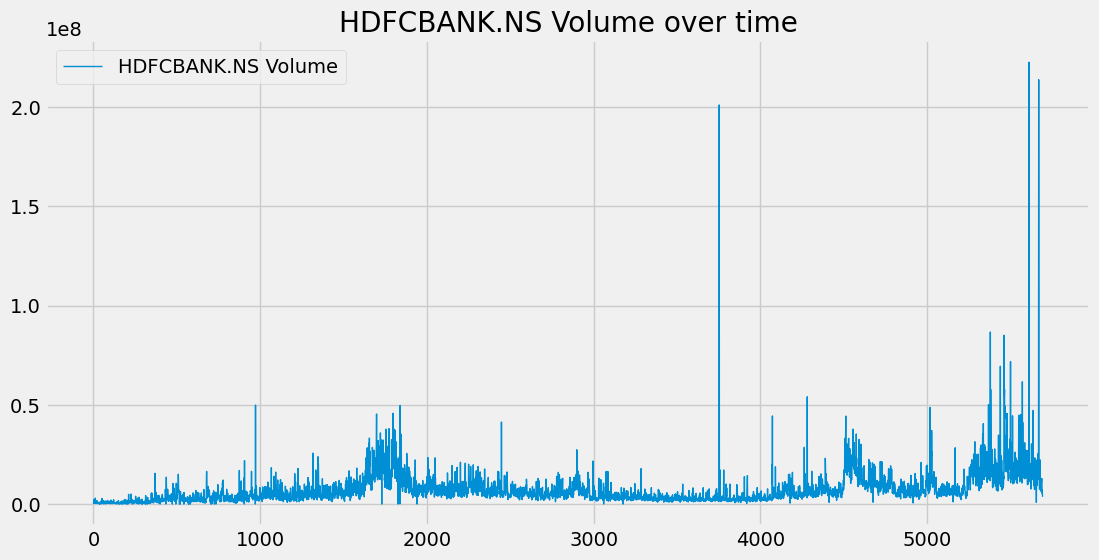

In [12]:
plt.figure(figsize=(12,6))
#plt.plot(df['Open'],label=f'{stock}Closing Price',linewidth=1)
plt.plot(df['Volume'],label=f'{stock} Volume',linewidth=1)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

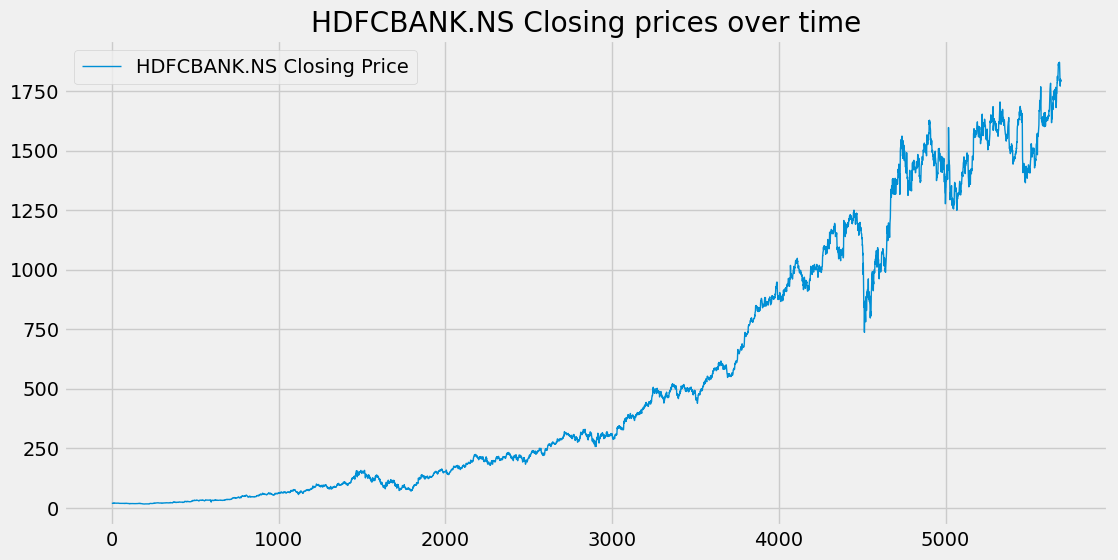

In [73]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f'{stock} Closing Price',linewidth=1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

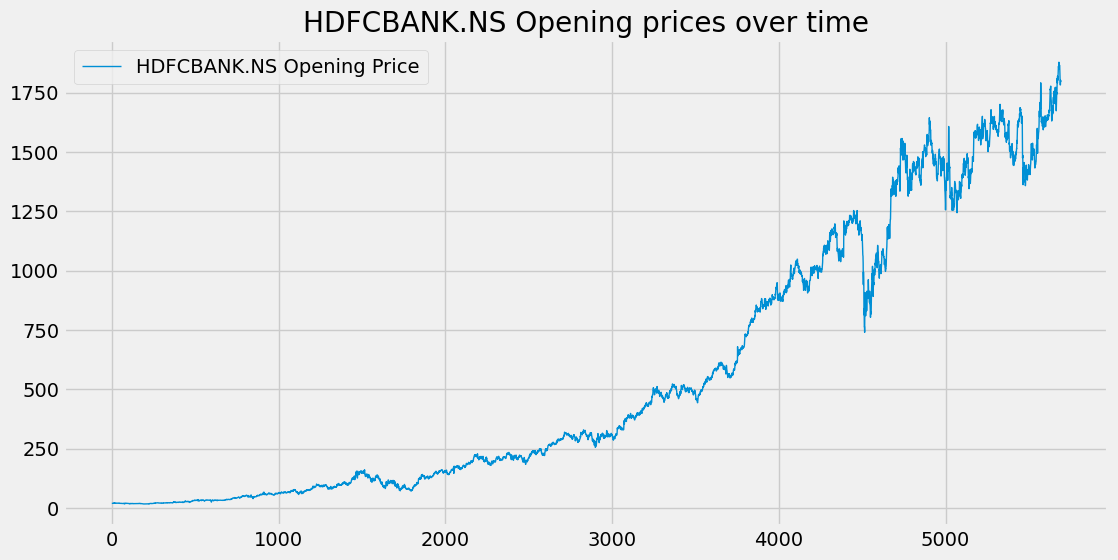

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'],label=f'{stock} Opening Price',linewidth=1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

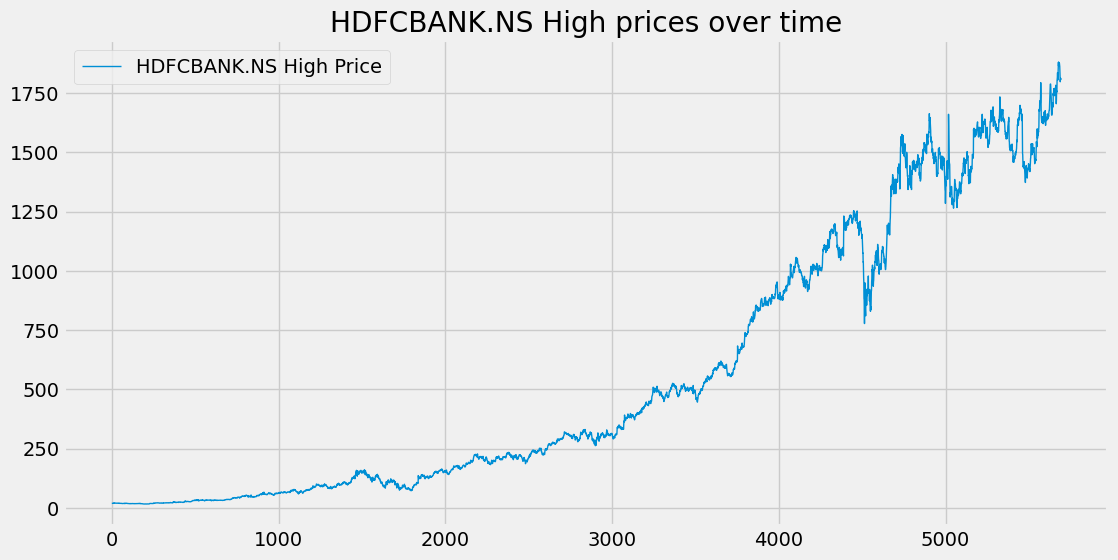

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['High'],label=f'{stock} High Price',linewidth=1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

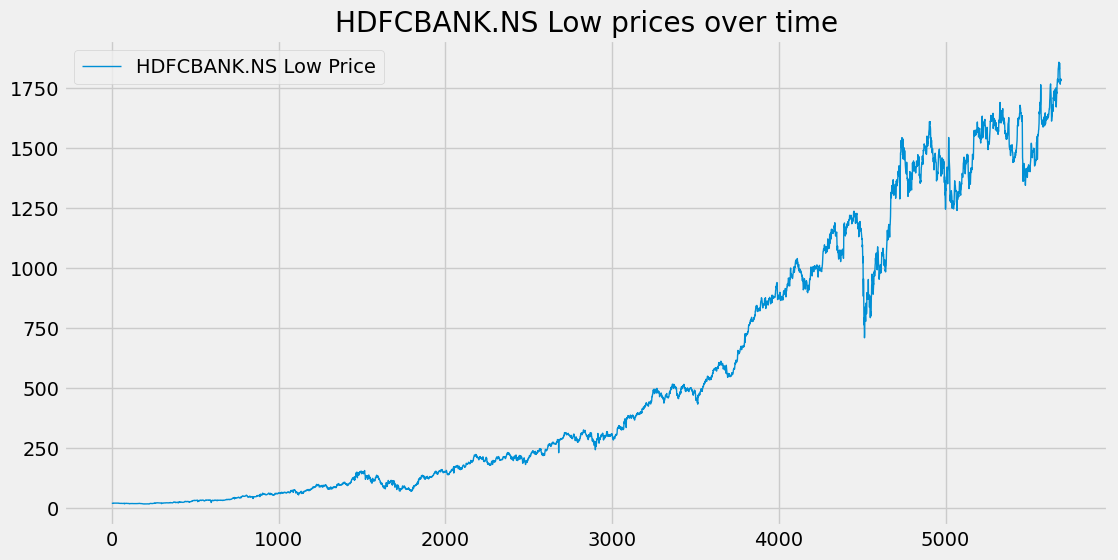

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'],label=f'{stock} Low Price',linewidth=1)
plt.title(f'{stock} Low prices over time')
plt.legend()
plt.show()

Now we will learn about moving average(a tactic on stock).
suppose we have temp [10,20,30,40,50,60,70,80,90,100]
so if i want moving average of 5 days toh ans should be null null null null 30.0 40.0 50.0 etc cuz see, 5 din ka interval hai toh 1st 4 days should be null ok. now to calculate moving avg for each row, we use rolling()

In [16]:
temp=[10,2,30,40,50,60,70,80,90,100]
import pandas as pd
df1=pd.DataFrame(temp)
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,26.4
5,36.4
6,50.0
7,60.0
8,70.0
9,80.0


In [17]:
ma100 = df.Close.rolling(100).mean()
ma100 
#thats the moving average of top 100 ->one of the operations

Ticker,HDFCBANK.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5688,1712.152499
5689,1714.006998
5690,1715.830498
5691,1717.349998


In [18]:
ma200=df.Close.rolling(200).mean()

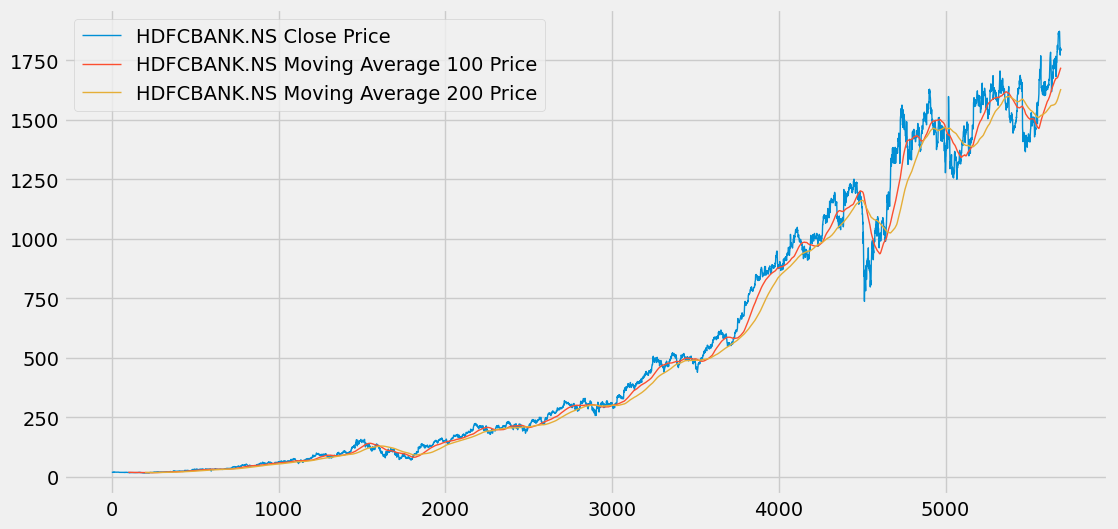

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label=f'{stock} Close Price',linewidth=1)
plt.plot(ma100,label=f'{stock} Moving Average 100 Price',linewidth=1)
plt.plot(ma200,label=f'{stock} Moving Average 200 Price',linewidth=1)
plt.legend()
plt.show()

So , using Moving average we can predict our stock prices
Now lets predict the next 30 days stocks.
This can be done using LSTM. Why not RNN? lets find out!
So LSTMs(Long ShortTerm Memory) address the memory retention issue and prevent information overflow in long sequences. Unlike RNNs(Recurrent Nueral Networks), which struggle with the vanishing gradient problem, LSTMs use memory cells and gates (forget, input, output) to control what information to remember or forget, enabling them to capture long-term dependencies effectively in tasks like text and time-series analysis.

In [81]:
#to calculate the exponential moving average
em100 = df.Close.ewm(span=100,adjust=False).mean()

In [82]:
em200 = df['Close'].ewm(span = 200, adjust=False).mean()

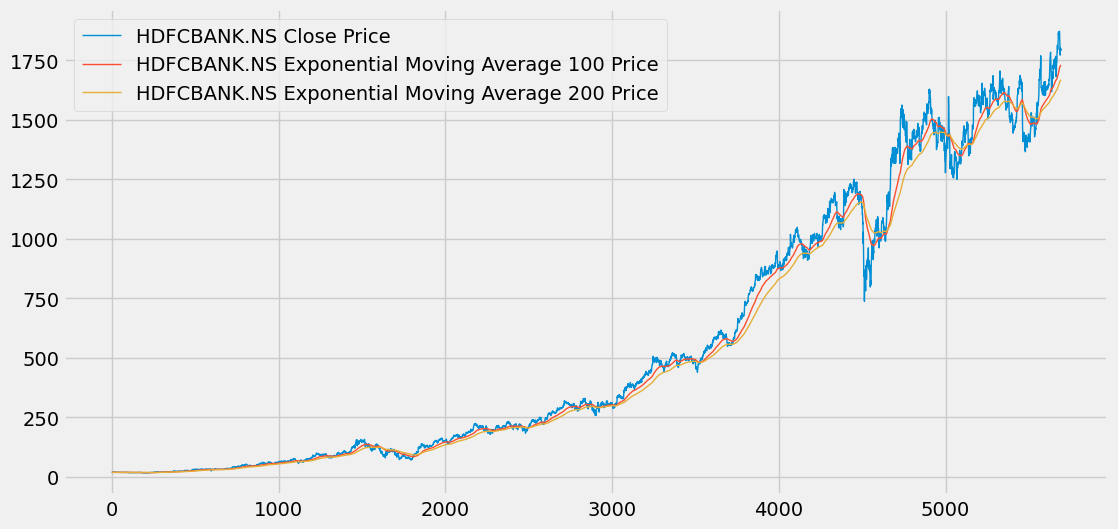

In [83]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label=f'{stock} Close Price',linewidth=1)
plt.plot(em100,label=f'{stock} Exponential Moving Average 100 Price',linewidth=1)
plt.plot(em200,label=f'{stock} Exponential Moving Average 200 Price',linewidth=1)
plt.legend()
plt.show()

In [21]:
#Now divide the dataset for training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) # means 70%of data is used for training
data_testing=pd.DataFrame(df['Close'][0:int(len(df)*0.70):int(len(df))]) # means 70%of data is used for testing

In [22]:
data_training.shape

(3985, 1)

In [23]:
data_testing.shape

(1, 1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array
#you will get an array with elements ranging from 0 to 1

array([[0.00316032],
       [0.00319227],
       [0.00296859],
       ...,
       [0.99422227],
       [1.        ],
       [0.99375604]])

In [25]:
x_train=[] #features->independent variable
y_train=[] #target->dependent variable
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train) , np.array(y_train)

In [26]:
x_train.shape

(3885, 100, 1)

MODEL BUILDING    
LTSM -> 3D Array (batch_size,time_steps,sequence_length)
2D Array ->(batch_size,units)

In [27]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
# First LSTM layer with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with Dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer (last LSTM layer) with Dropout
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 30s 203ms/step - loss: 0.0279
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 39s 321ms/step - loss: 0.0030
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - loss: 0.0030
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - loss: 0.0024
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - loss: 0.0025
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - loss: 0.0022
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 34s 276ms/step - loss: 0.0019
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - loss: 0.0017
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - loss: 0.0018
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - loss: 0.0019
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 29s 237ms/step - loss: 0.0019
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - loss: 0.0018
Epoch 13/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - loss: 0.0015
Epoch 14/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - loss: 0.0019
Epoch 15/50
122

In [30]:
data_training.tail(100)

Ticker,HDFCBANK.NS
3885,835.976440
3886,828.078308
3887,830.182922
3888,832.334839
3889,835.479858
...,...
3980,894.101257
3981,914.816406
3982,923.281982
3983,928.555359


In [31]:
# Correct the data slicing for training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

# Prepare the final dataframe for testing
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [32]:
input_data = scaler.fit_transform(final_df)

In [33]:
x_test=[] #features->independent variable
y_test=[] #target->dependent variable
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [34]:
x_test.shape

(1708, 100, 1)

In [35]:
y_predicted = model.predict(x_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step


In [36]:
y_predicted.shape

(1708, 1)

In [43]:
scaler.scale_=0.00109666

In [44]:
# Rescale the predictions back to original scale
scaler_factor = 1 / scaler.scale_
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

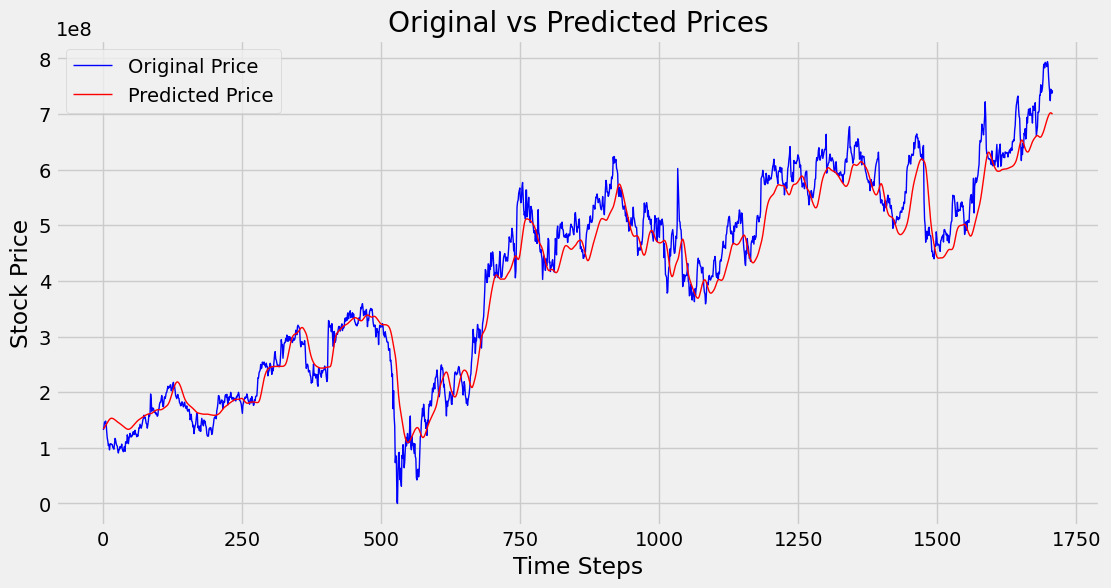

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Original Price", color='blue', linewidth=1)
plt.plot(range(len(y_predicted)), y_predicted, label="Predicted Price", color='red',linewidth=1)
plt.legend()
plt.title("Original vs Predicted Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.show()

In [52]:
model.save('stock_dl_model.h5')